# Questions

- What are the key demographic and clinical characteristics of individuals with diabetes?
- How does diabetes relate to the occurrence of other health conditions?
- What are the various ways in which diabetes can impact a person's quality of life?


In [10]:
#Import required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats

%matplotlib inline

In [275]:
#Read the csv file and add it to a DataFrame
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

## Exploratory Data Analysis (EDA)

In [5]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
age = {1:"18-24", 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80 or older'}
edu = {1:"Never attended school or only kindergarten", 2:"Grades 1 - 8 (Elementary)", 3:"Grades 9 - 11 (Some high school)", 4:"Grade 12 or GED (High school graduate)", 5:"College 1 year to 3 years (Some college or technical school)", 6:"College 4 years or more (College graduate)"}

In [276]:
#Renamed the Diabetes column
df.rename(columns={'Diabetes_012':'DiabetesType'}, inplace=True)

In [86]:
df.shape

(253680, 22)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DiabetesType,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DiabetesType          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [14]:
df.nunique()

DiabetesType             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [87]:
df.isnull().sum()

DiabetesType            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [113]:
#Changes the data type of some columns
df['DiabetesType'] = df['DiabetesType'].astype('int')
df['Age'] =  df['Age'].astype('int')

In [302]:
#Split two data frame, diabetes Yes and No
df_diabetes_yes = df[(df['DiabetesType'] == 1) | (df['DiabetesType'] == 2)]
df_diabetes_no = df[df['DiabetesType'] == 0]

In [301]:
#Proportion of diabetes positive in the dataset
diabetes_prop = round(len(df_diabetes_yes)/len(df)*100,2)
print(f"{diabetes_prop}% of the individuals have diabetes type one or two.")

15.76% of the individuals have diabetes type one or two.


In [303]:
#Which gender tends more to diabetes in the dataset (0 = female 1 = male)

f=df_diabetes_yes['Sex'].value_counts()[0]/len(df)*100
m=df_diabetes_yes['Sex'].value_counts()[1]/len(df)*100

f=round(f,2)
m=round(m,2)

print(f'{f}% of the female has diabetes and {m}% of the male')

8.28% of the female has diabetes and 7.47% of the male


In [432]:
df['DiabetesType'].value_counts()[1]

4631

In [433]:
#Proportion of the different diabetes types

type1 = df['DiabetesType'].value_counts()[1]/len(df)*100
type2 = df['DiabetesType'].value_counts()[2]/len(df)*100

print(f'Type 1 Diabetes: {type1}% vs. {type2}% of Type 2')

Type 1 Diabetes: 1.8255282245348472% vs. 13.933301797540206% of Type 2


### What are the key demographic and clinical characteristics of individuals with diabetes?

[Text(0.5, 1.0, 'Diabetes Positive')]

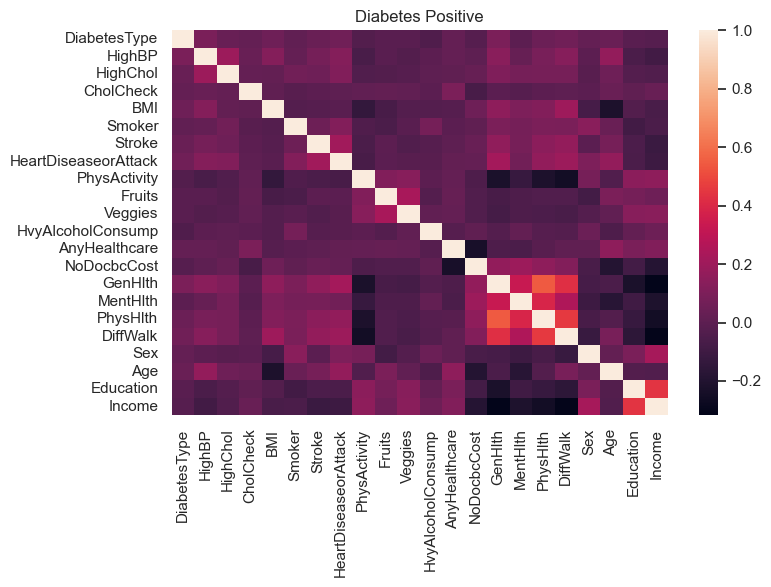

In [196]:
#Let's see the correlation between Diabates positive and the Features in a heatmap
correlation_matrix_yes = df_diabetes_yes.corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix_yes).set(title='Diabetes Positive')

In [299]:
correlation_matrix_yes['DiabetesType'].sort_values()

HvyAlcoholConsump      -0.042977
PhysActivity           -0.031884
NoDocbcCost            -0.024151
Income                 -0.020359
Education              -0.011744
Fruits                 -0.010924
Veggies                -0.009369
MentHlth               -0.002437
Smoker                  0.016300
AnyHealthcare           0.023341
CholCheck               0.024243
Sex                     0.026546
HighChol                0.033415
Stroke                  0.039727
Age                     0.039945
PhysHlth                0.045890
BMI                     0.053257
HeartDiseaseorAttack    0.062072
DiffWalk                0.062485
HighBP                  0.090034
GenHlth                 0.099243
DiabetesType            1.000000
Name: DiabetesType, dtype: float64

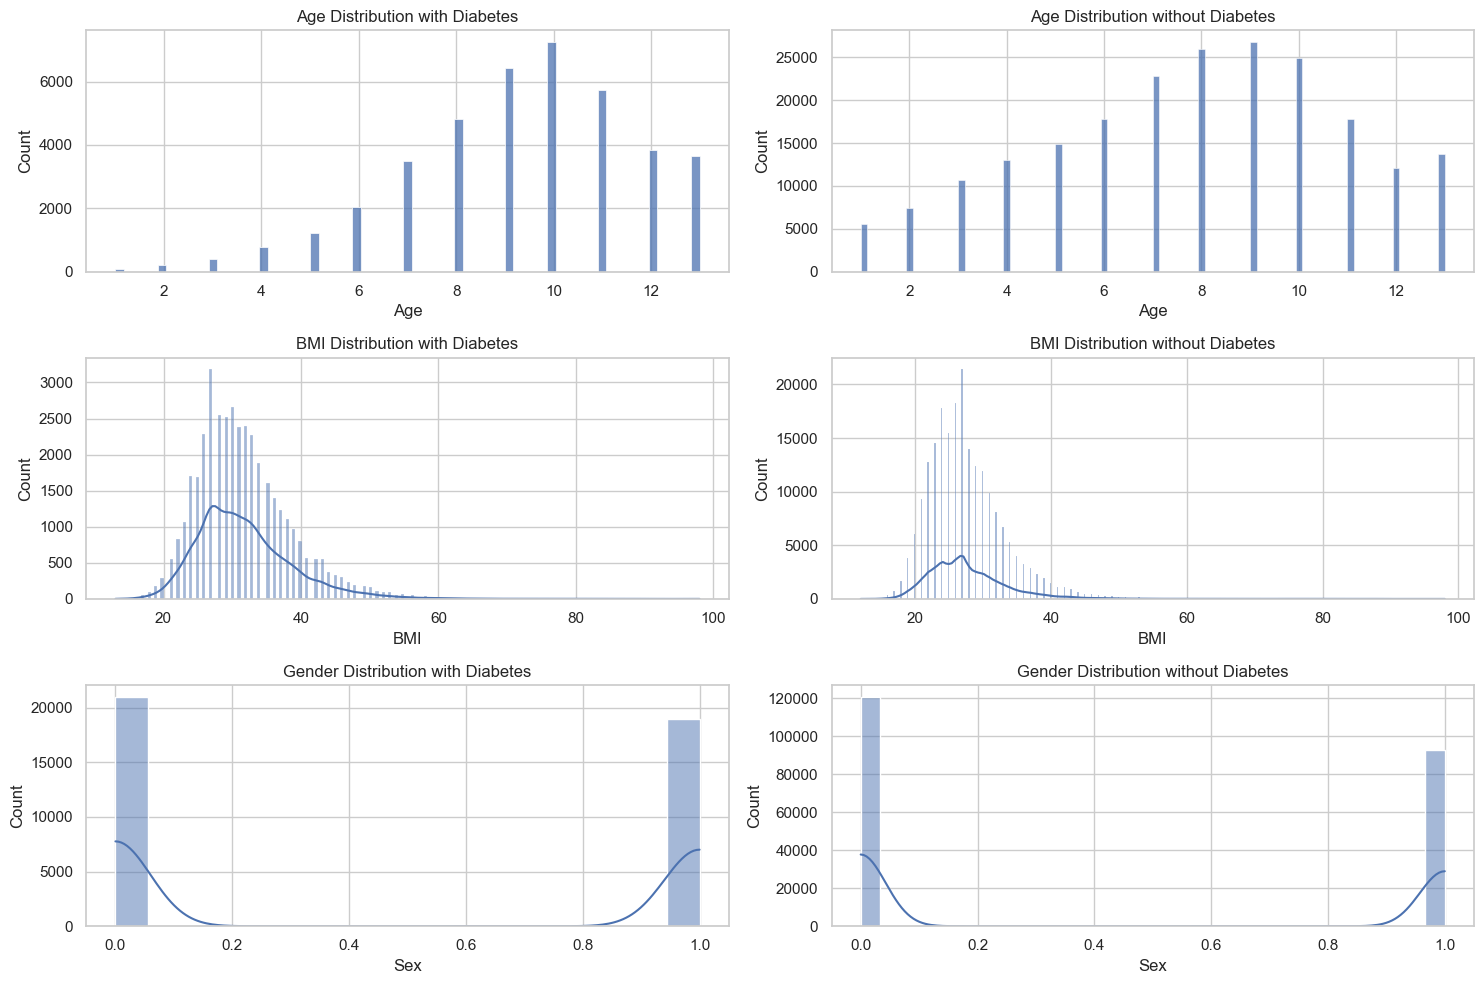

In [427]:
#Data distribution overview

age = {1:'18-24',
       2:'25-29',
       3:'30-34',
       4:'35-39',
       5:'40-44',
       6:'45-49',
       7:'50-54',
       8:'55-59',
       9:'60-64',
       10:'65-69',
       11:'70-74',
       12:'75-79',
       13:'80 or older'}

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(data=df_diabetes_yes, x='Age')
plt.title('Age Distribution with Diabetes')

plt.subplot(3, 2, 2)
sns.histplot(data=df_diabetes_no, x='Age')
plt.title('Age Distribution without Diabetes')

plt.subplot(3, 2, 3)
sns.histplot(data=df_diabetes_yes, x='BMI', kde=True)
plt.title('BMI Distribution with Diabetes')

plt.subplot(3, 2, 4)
sns.histplot(data=df_diabetes_no, x='BMI', kde=True)
plt.title('BMI Distribution without Diabetes')

plt.subplot(3, 2, 5)
sns.histplot(data=df_diabetes_yes, x='Sex', kde=True)
plt.title('Gender Distribution with Diabetes')

plt.subplot(3, 2, 6)
sns.histplot(data=df_diabetes_no, x='Sex', kde=True)
plt.title('Gender Distribution without Diabetes')

plt.tight_layout()
plt.show()

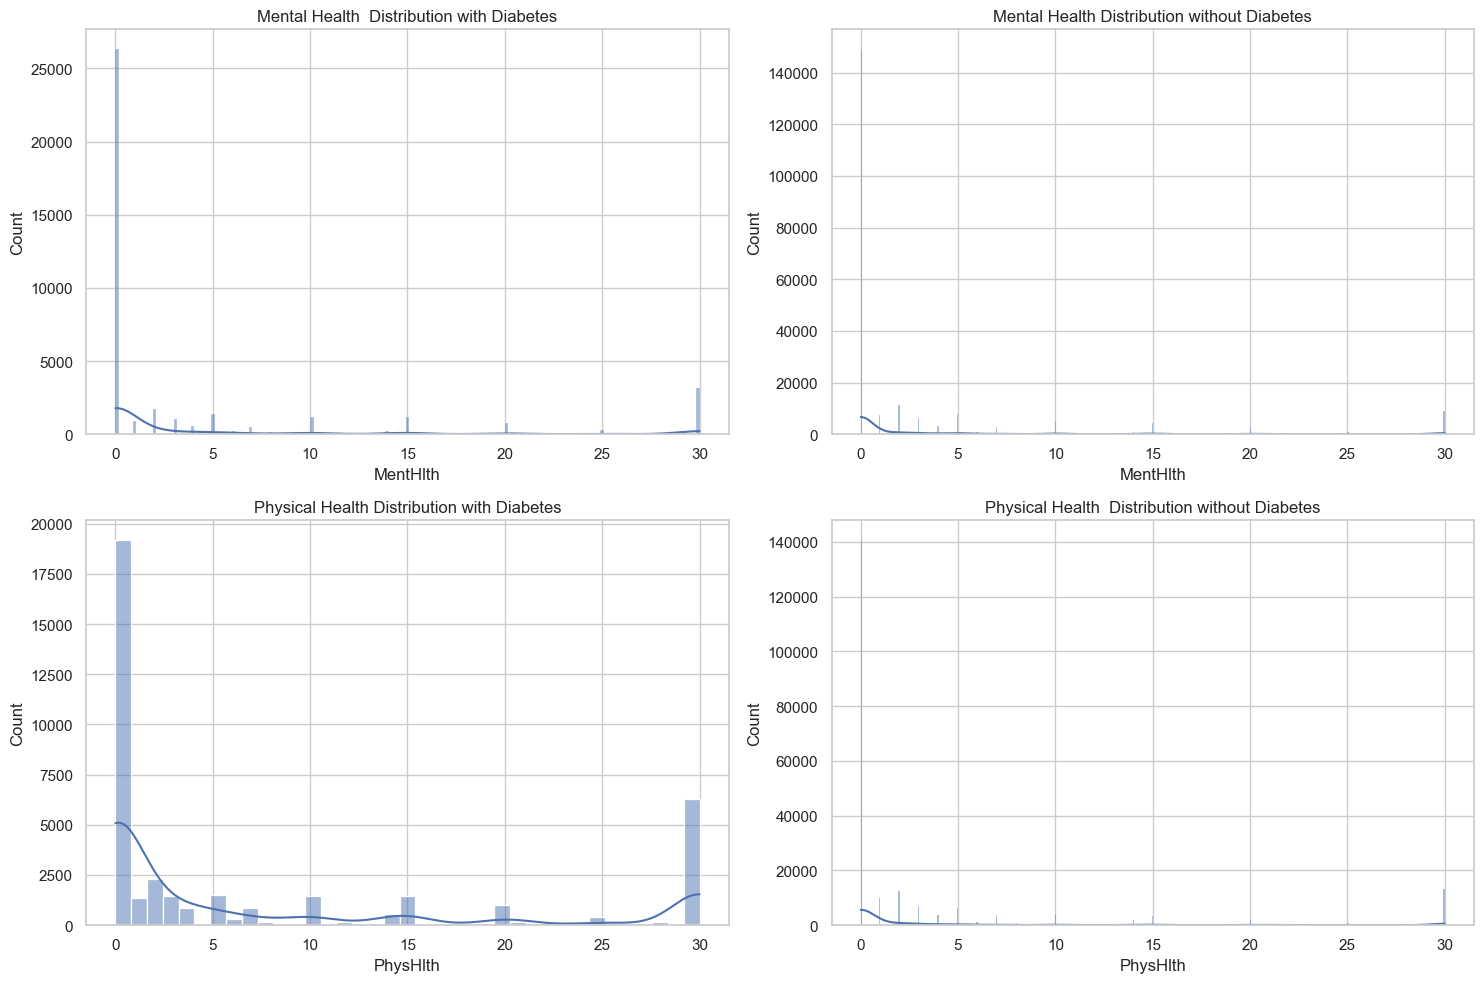

In [435]:
#Data distribution overview
#MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30
#PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df_diabetes_yes, x='MentHlth', kde=True)
plt.title('Mental Health  Distribution with Diabetes')

plt.subplot(2, 2, 2)
sns.histplot(data=df_diabetes_no, x='MentHlth', kde=True)
plt.title('Mental Health Distribution without Diabetes')

plt.subplot(2, 2, 3)
sns.histplot(data=df_diabetes_yes, x='PhysHlth', kde=True)
plt.title('Physical Health Distribution with Diabetes')

plt.subplot(2, 2, 4)
sns.histplot(data=df_diabetes_no, x='PhysHlth', kde=True)
plt.title('Physical Health Distribution without Diabetes')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Type 2 Diabetes')

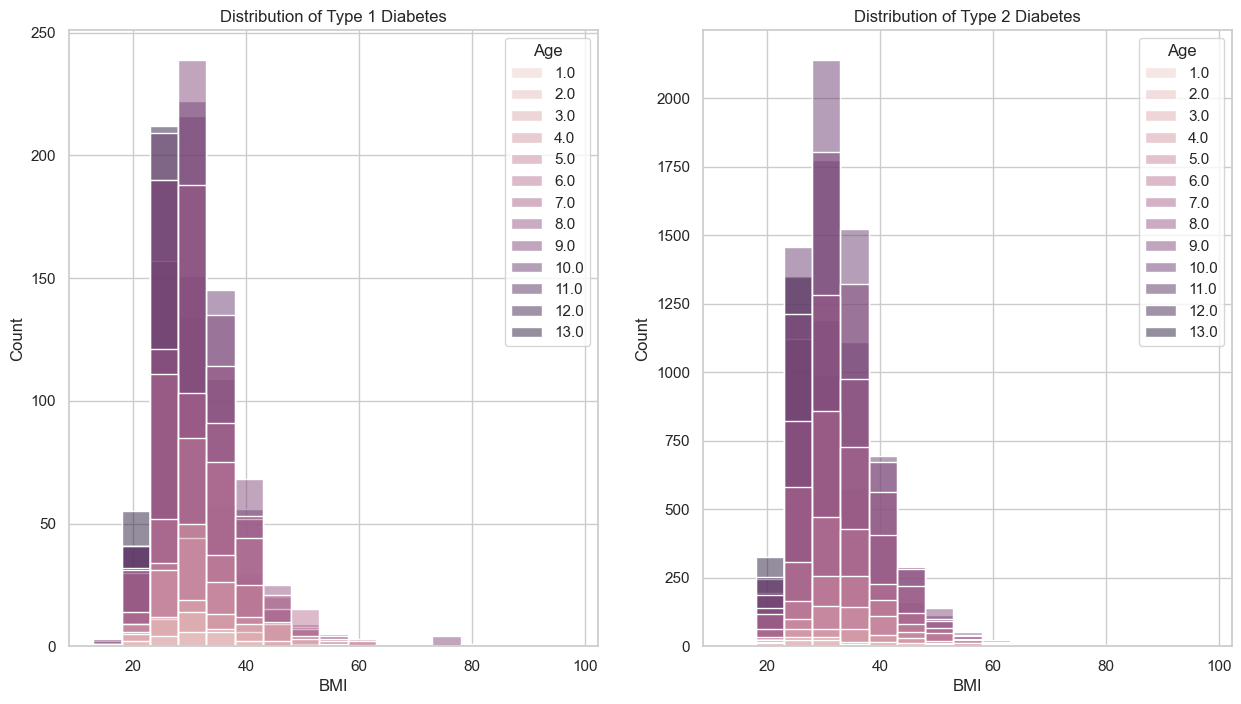

In [454]:
#Data distribution overview
df_diabetes_yes1 = df[(df['DiabetesType'] == 1)]
df_diabetes_yes2 = df[(df['DiabetesType'] == 2)]

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(data=df_diabetes_yes1, x='BMI', hue='Age', binwidth=5)
plt.title('Distribution of Type 1 Diabetes')

plt.subplot(1, 2, 2)
sns.histplot(data=df_diabetes_yes2, x='BMI', hue='Age', binwidth=5)
plt.title('Distribution of Type 2 Diabetes')

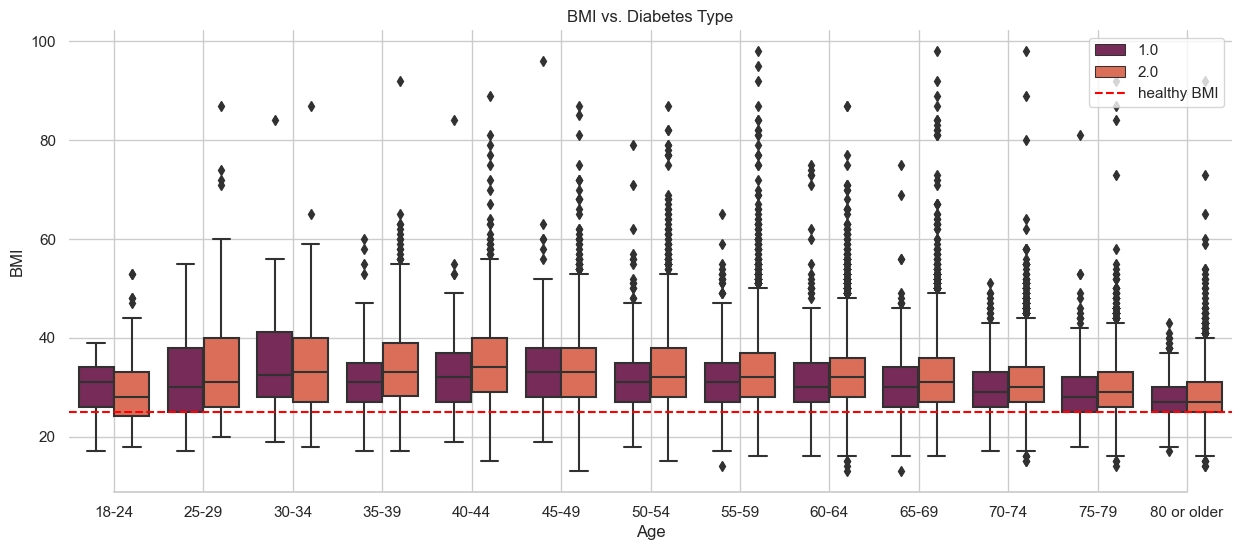

In [426]:
#Boxplot to compare median and distribution for BMI with the age for individuals with diabetes, splitted in type 1 and 2 diabetes
age = ['18-24',
       '25-29',
       '30-34',
       '35-39',
       '40-44',
       '45-49',
       '50-54',
       '55-59',
       '60-64',
       '65-69',
       '70-74',
       '75-79',
       '80 or older']

f, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=df_diabetes_yes, x='Age',y='BMI', hue='DiabetesType', palette='rocket')

ax.xaxis.grid(True)
ax.set(xticklabels=age)
ax.set(ylabel="BMI")
ax.set(title='BMI vs. Diabetes Type')
sns.despine(trim=True, left=True)

threshold_value = 25  
plt.axhline(y=threshold_value, color='red', linestyle='--', label='healthy BMI')
plt.legend(loc='upper right')


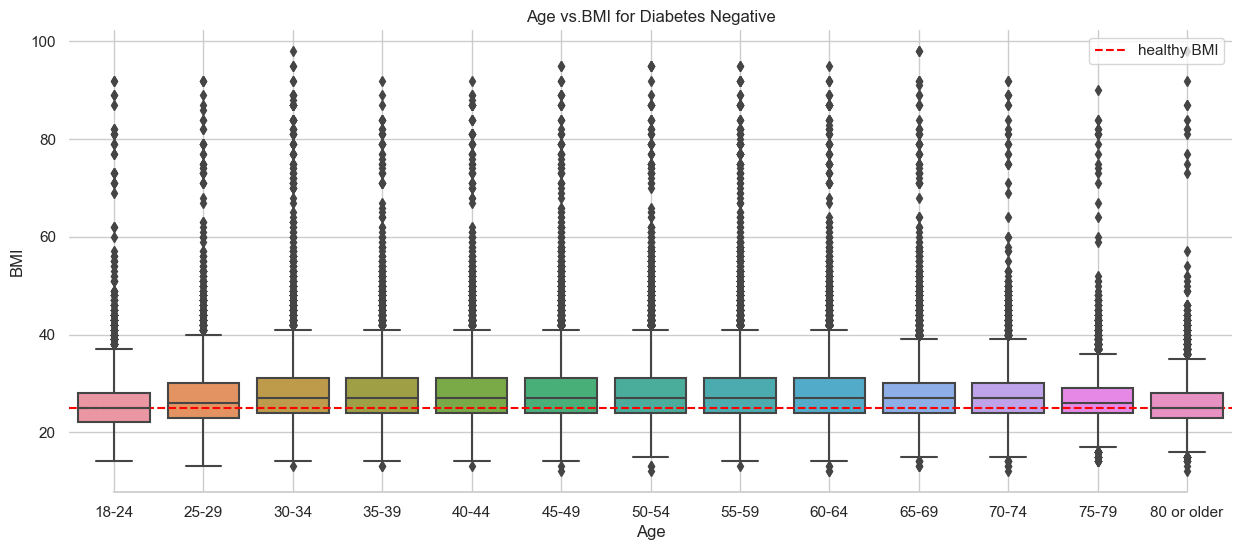

In [419]:
#Boxplot to compare median and distribution for BMI with the age for individuals without diabetes
f, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=df_diabetes_no, x='Age',y='BMI')

ax.xaxis.grid(True)
ax.set(xticklabels=age)
ax.set(ylabel="BMI")
ax.set(title='Age vs.BMI for Diabetes Negative')
sns.despine(trim=True, left=True)

threshold_value = 25  
plt.axhline(y=threshold_value, color='red', linestyle='--', label='healthy BMI')
plt.legend(loc='upper right')

In [121]:
#Hypothesis test see if therer is an impact between BMI and Diabetes

'''
Null Hypothesis (H0): There is no significant difference in the mean BMI between individuals with and without diabetes.

Alternative Hypothesis (H1): There is a significant difference in the mean BMI between individuals with and without diabetes.
'''

# Separate the data into two groups: individuals with and without diabetes
group_diabetes = df_diabetes_yes['BMI']
group_no_diabetes = df_diabetes_no['BMI']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(group_diabetes, group_no_diabetes)

# Set the significance level
p_val = 0.05

# Compare the p-value to alpha to make a decision
if p_value < p_val:
    print("Reject the null hypothesis. There is a significant difference in mean BMI between individuals with and without diabetes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean BMI between individuals with and without diabetes.")


Reject the null hypothesis. There is a significant difference in mean BMI between individuals with and without diabetes.


In [122]:
#Hypothesis test see if therer is an impact between Age and Diabetes
'''
Null Hypothesis (H0): There is no significant difference in the mean age between individuals with and without diabetes.

Alternative Hypothesis (H1): There is a significant difference in the mean age between individuals with and without diabetes.
'''

# Create a contingency table
contingency_table = pd.crosstab(df['Age'], df['DiabetesType'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level
p_val = 0.05

# Compare the p-value to alpha to make a decision
if p < p_val:
    print("Reject the null hypothesis. There is a significant association between age and diabetes status.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age and diabetes status.")


Reject the null hypothesis. There is a significant association between age and diabetes status.


### How does diabetes relate to the occurrence of other health conditions?

Text(0, 0.5, 'Heart Disease or Attack')

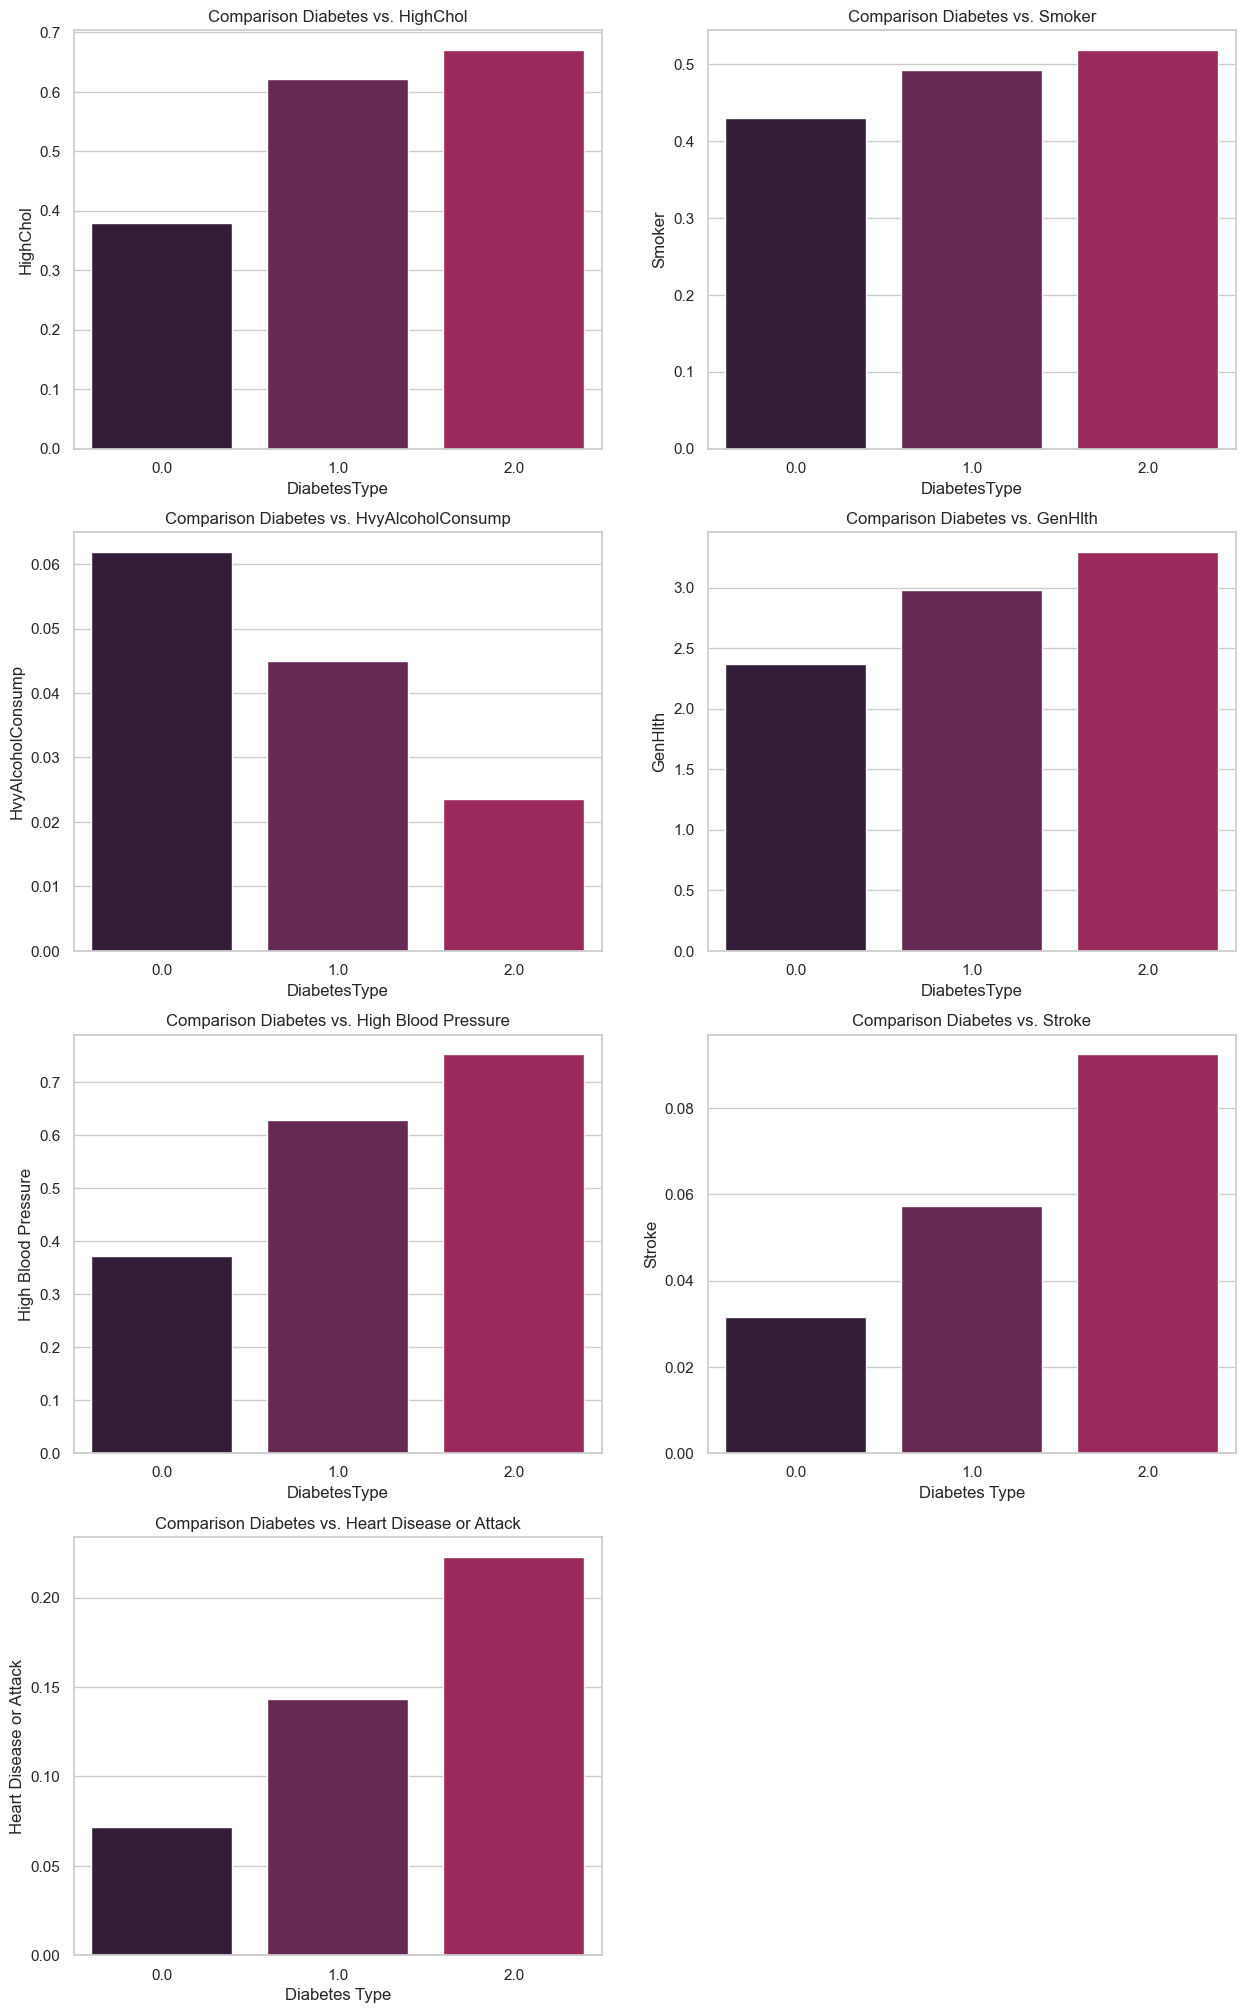

In [457]:
#Barplot to compare diabetes with more columns in terms of Health

plt.figure(figsize=(15, 25))
#sns.set(style="whitegrid")
sns.set_theme(style="whitegrid", palette='rocket')


#Risk for HighChol
plt.subplot(4, 2, 1)
sns.barplot(x='DiabetesType', y='HighChol', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. HighChol")
plt.xlabel("DiabetesType")
plt.ylabel("HighChol")

#Risk for Smoker
plt.subplot(4, 2, 2)
sns.barplot(x='DiabetesType', y='Smoker', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. Smoker")
plt.xlabel("DiabetesType")
plt.ylabel("Smoker")

#Risk for HvyAlcoholConsump
plt.subplot(4, 2, 3)
sns.barplot(x='DiabetesType', y='HvyAlcoholConsump', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. HvyAlcoholConsump")
plt.xlabel("DiabetesType")
plt.ylabel("HvyAlcoholConsump")

#Risk for GenHlth
#Would you say that in general your health is scale 1-5: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
plt.subplot(4, 2, 4)
sns.barplot(x='DiabetesType', y='GenHlth', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. GenHlth")
plt.xlabel("DiabetesType")
plt.ylabel("GenHlth")

#Risk for HighBP
plt.subplot(4, 2, 5)
sns.barplot(x='DiabetesType', y='HighBP', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. High Blood Pressure")
plt.xlabel("DiabetesType")
plt.ylabel("High Blood Pressure")

#Risk for stroke
plt.subplot(4, 2, 6)
sns.barplot(x='DiabetesType', y='Stroke', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. Stroke")
plt.xlabel("Diabetes Type")
plt.ylabel("Stroke")

#Risk for HeartDiseaseorAttack
plt.subplot(4, 2, 7)
sns.barplot(x='DiabetesType', y='HeartDiseaseorAttack', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. Heart Disease or Attack")
plt.xlabel("Diabetes Type")
plt.ylabel("Heart Disease or Attack")


### What are the various ways in which diabetes can impact a person's quality of life?

Text(0, 0.5, 'NoDocbcCost')

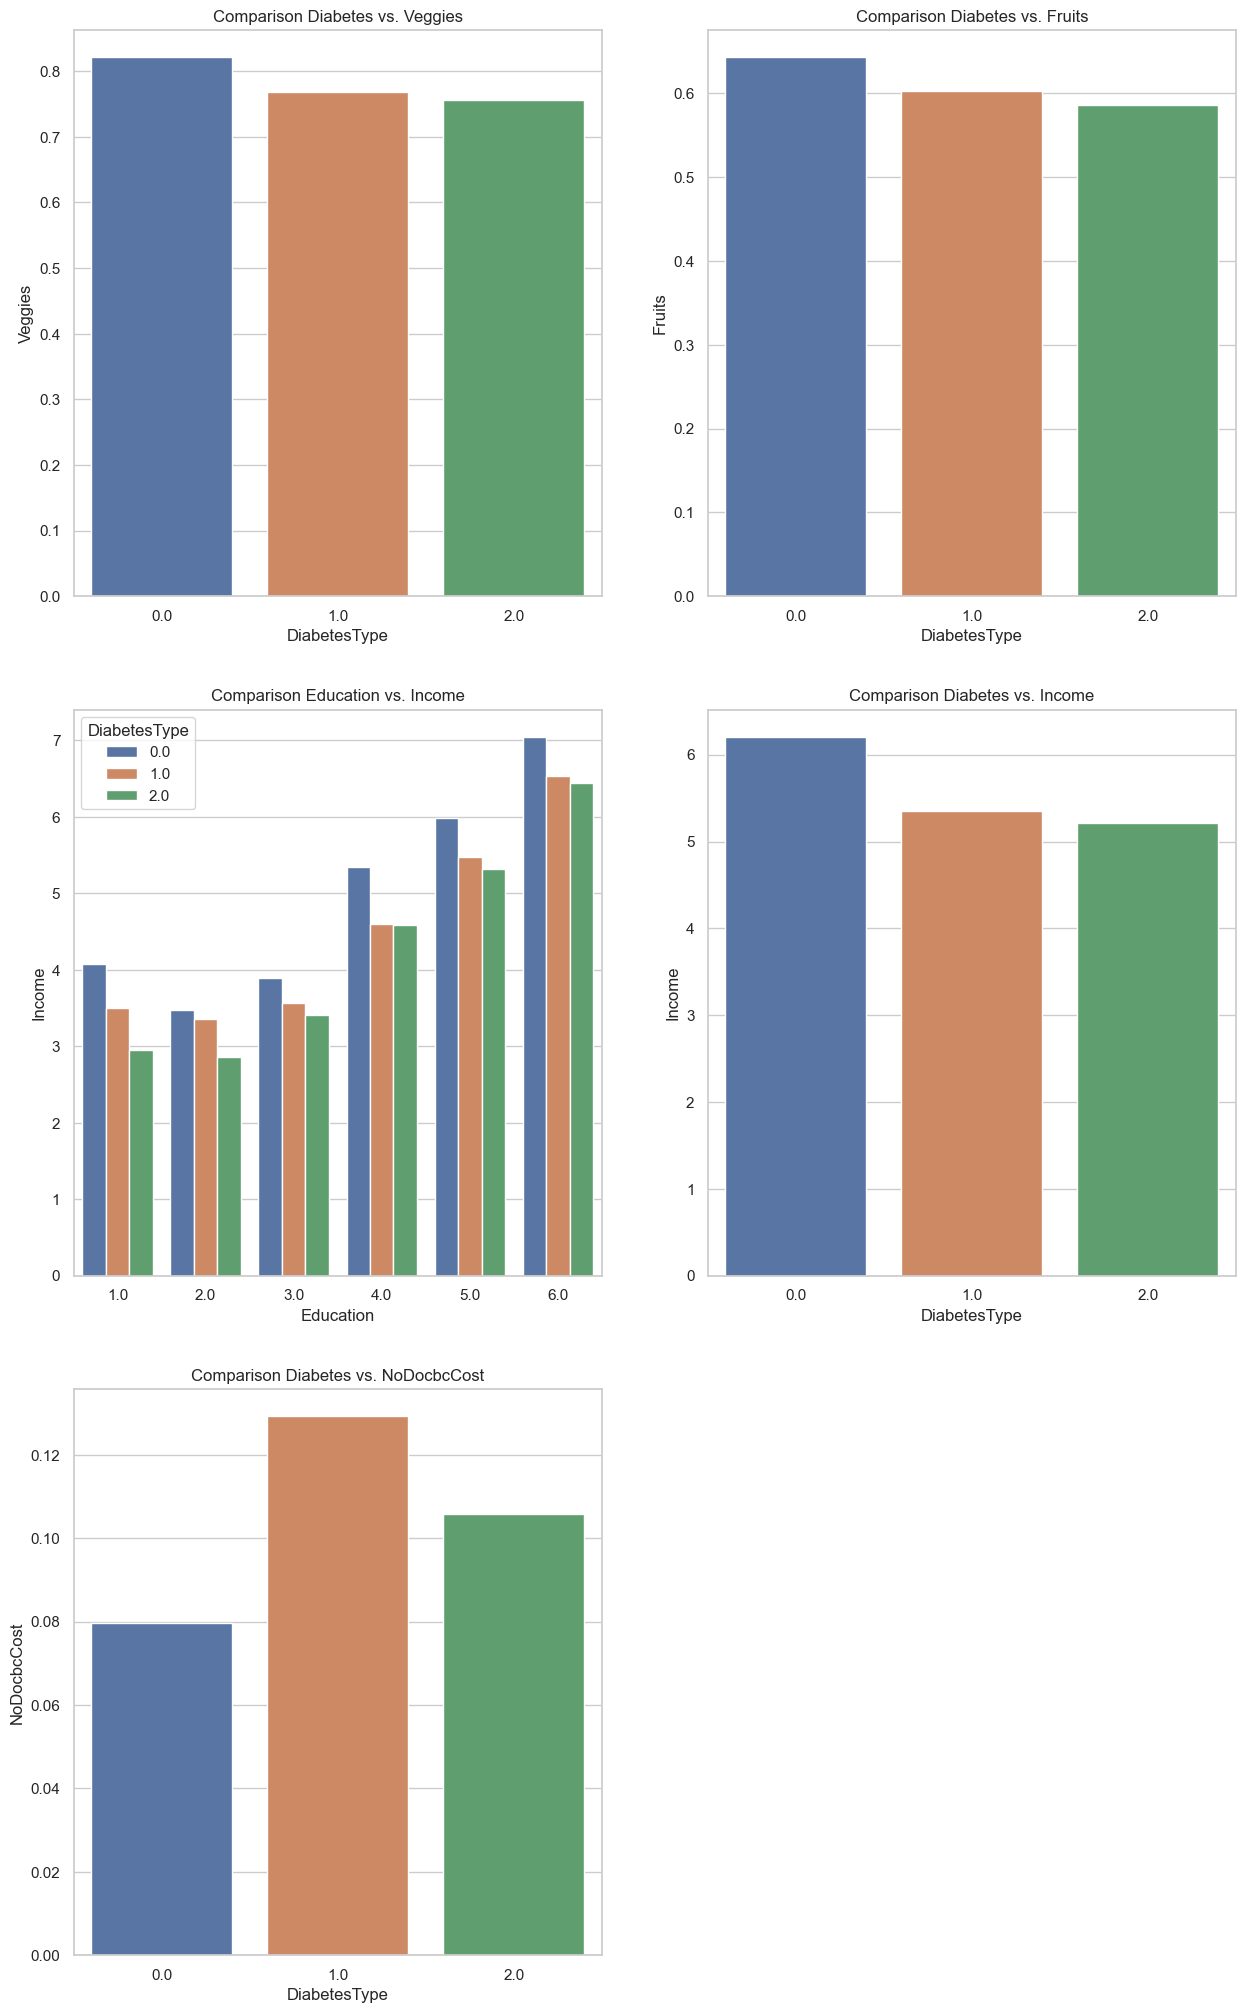

In [458]:
#Barplot to compare diabetes with more columns in terms of life quality
'''
education_grade = {1:"Never attended school or only kindergarten",
                    2:"Grades 1 - 8 (Elementary)",
                    3:"Grades 9 - 11 (Some high school)",
                    4:"Grade 12 or GED (High school graduate)",
                    5:"College 1 year to 3 years (Some college or technical school)",
                    6:"College 4 years or more (College graduate)"}
'''

plt.figure(figsize=(15, 25))
sns.set(style="whitegrid")

#Veggies
plt.subplot(3, 2, 1)
sns.barplot(x='DiabetesType', y='Veggies', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. Veggies")
plt.xlabel("DiabetesType")
plt.ylabel("Veggies")

#Fruits
plt.subplot(3, 2, 2)
sns.barplot(x='DiabetesType', y='Fruits', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. Fruits")
plt.xlabel("DiabetesType")
plt.ylabel("Fruits")

#Education
plt.subplot(3, 2, 3)
sns.barplot(x='Education', y='Income', hue='DiabetesType', data=df, errorbar=None)
plt.title("Comparison Education vs. Income")
plt.xlabel("Education")
plt.ylabel("Income")

#Income
plt.subplot(3, 2, 4)
sns.barplot(x='DiabetesType', y='Income', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. Income")
plt.xlabel("DiabetesType")
plt.ylabel("Income")

#NoDocbcCost
plt.subplot(3, 2, 5)
sns.barplot(x='DiabetesType', y='NoDocbcCost', data=df, errorbar=None)
plt.title("Comparison Diabetes vs. NoDocbcCost")
plt.xlabel("DiabetesType")
plt.ylabel("NoDocbcCost")

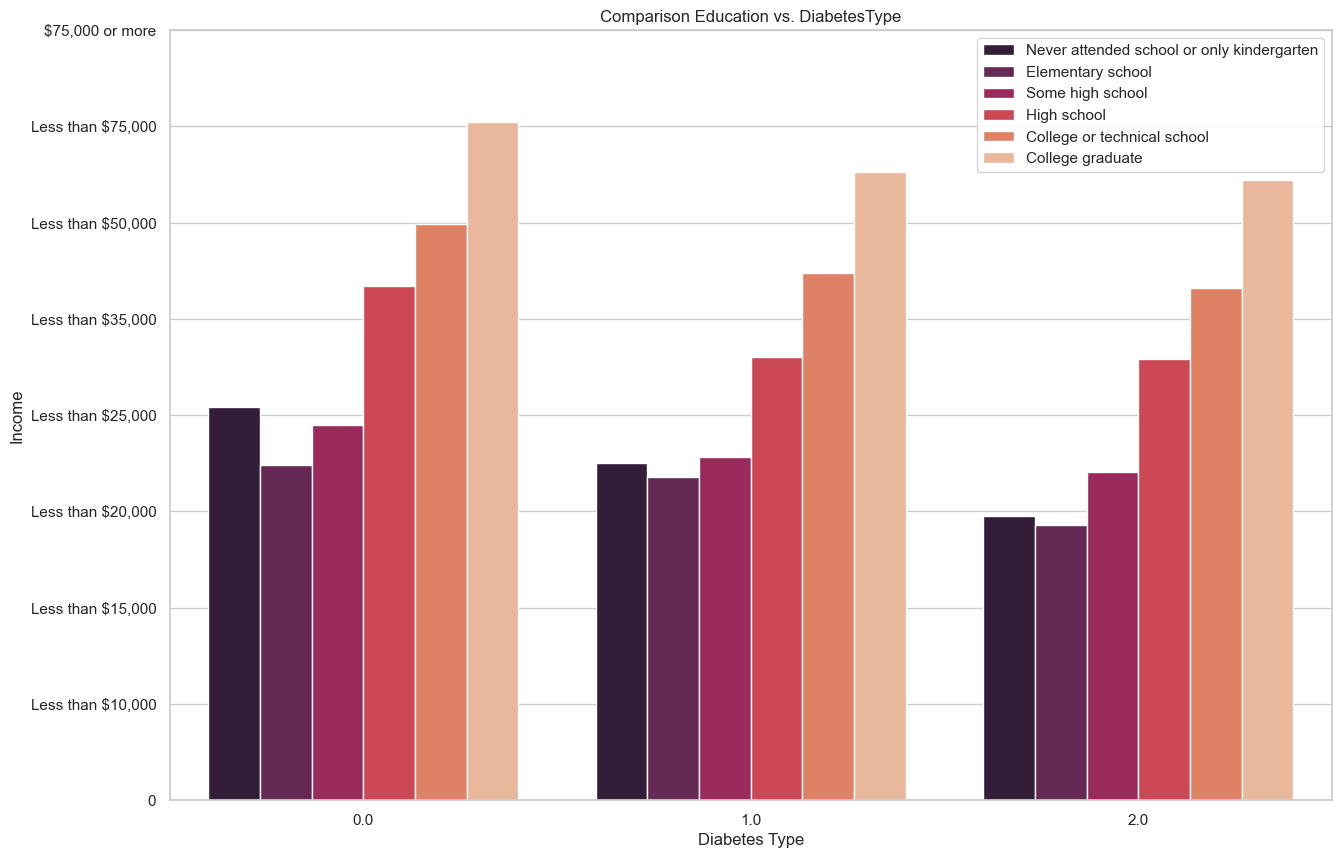

In [469]:
#Plot to compare Education and Income with diabetes

education_grade = ["Never attended school or only kindergarten",
                    "Elementary school",
                    "Some high school",
                    "High school",
                    "College or technical school",
                    "College graduate"]

income = ["0", "Less than $10,000",
          "Less than $15,000",
          "Less than $20,000",
          "Less than $25,000",
          "Less than $35,000",
          "Less than $50,000",
          "Less than $75,000",
          "$75,000 or more"]

sns.set_theme(style="whitegrid", palette='rocket')
plt.figure(figsize=(15,10))

sns.barplot(x='DiabetesType', y='Income',hue='Education', data=df, errorbar=None)
plt.title("Comparison Education vs. DiabetesType")
plt.xlabel("Diabetes Type")
plt.ylabel("Income")
plt.yticks(range(len(income)), income)
plt.legend(education_grade)

Text(0, 0.5, 'Fruits')

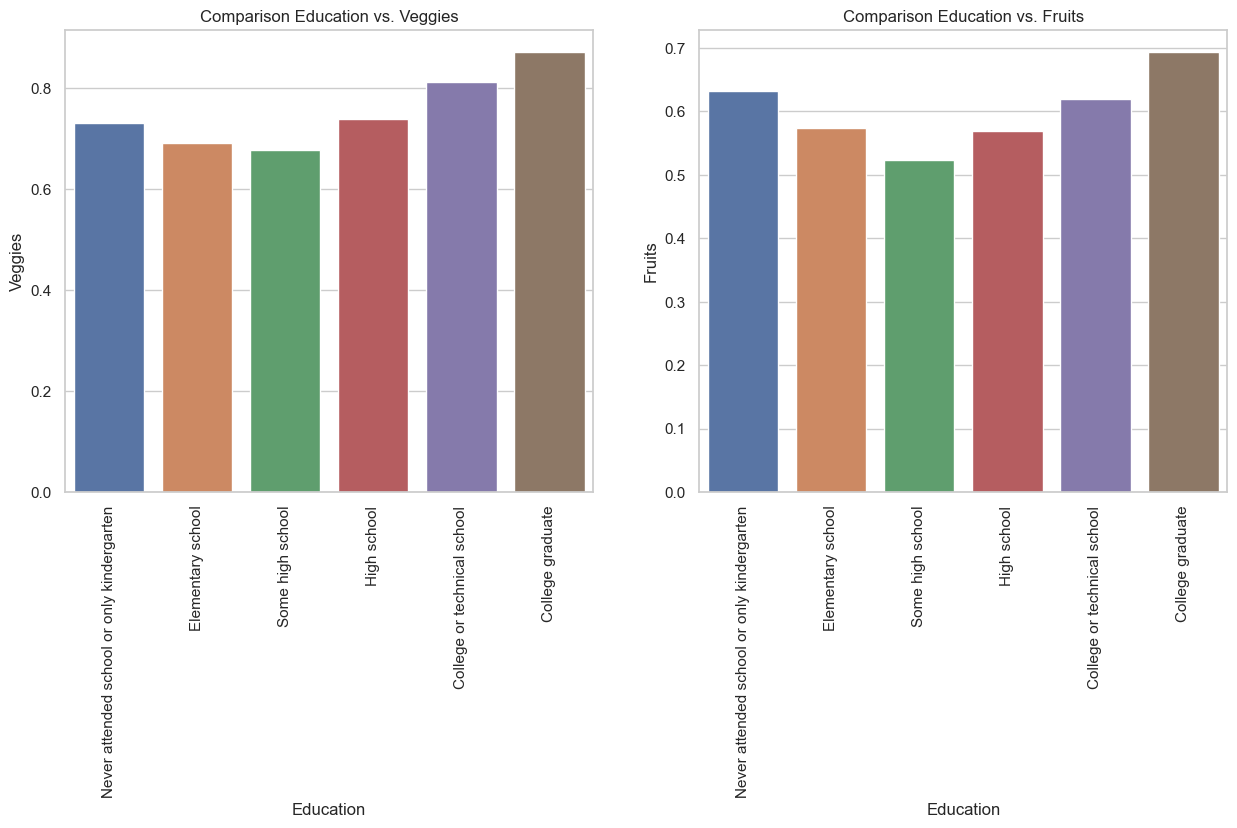

In [343]:
#Plot to compare if Education has an impact on the food selection

plt.figure(figsize=(15,6))
sns.set(style="whitegrid")

plt.subplot(1, 2, 1)
sns.barplot(x='Education', y='Veggies', data=df, errorbar=None)
plt.title("Comparison Education vs. Veggies")
plt.xticks(range(len(education_grade)), education_grade, rotation='vertical')
plt.xlabel("Education")
plt.ylabel("Veggies")

plt.subplot(1, 2, 2)
sns.barplot(x='Education', y='Fruits', data=df, errorbar=None)
plt.title("Comparison Education vs. Fruits")
plt.xticks(range(len(education_grade)), education_grade, rotation='vertical')
plt.xlabel("Education")
plt.ylabel("Fruits")